As part of the project, hrough building a simple linear regression model in Python using Jupyter Notebook to predict the average price ($/tC2e) for the next 10 years based on the provided dataset.

*** talk more about the data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel('voluntary-carbon-market-size-by-value-and-volume-of-traded-carbon-credits.xlsx')
df.head(10)

Transaction Year  avg Price ($/ tC2e)  Annual value ($M)  \
0              2005             4.000000                 48   
1              2006             3.468750                111   
2              2007             5.128571                359   
3              2008             5.851852                790   
4              2009             4.532710                485   
5              2010             3.389313                444   
6              2011             6.020000                602   
7              2012             5.145631                530   
8              2013             4.985294                339   
9              2014             3.870130                298   

   Annual volume (MtC2e) ($M)  
0                          12  
1                          32  
2                          70  
3                         135  
4                         107  
5                         131  
6                         100  
7                         103  
8                          68  
9                          77

# Visualisations 
Let's visualise the data to see the relationship

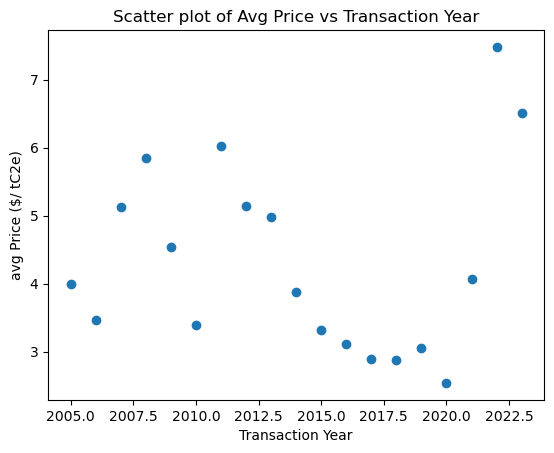

In [10]:
plt.scatter(df['Transaction Year'], df['avg Price ($/ tC2e)'])
plt.xlabel('Transaction Year')
plt.ylabel('avg Price ($/ tC2e)')
plt.title('Scatter plot of Avg Price vs Transaction Year')
plt.show()

# Building the Model
Prepare the data:
Assign the "Transaction Year" column as the independent variable (X) and "avg Price ($/ tC2e)" as the dependent variable (y).
Reshape X to a 2D array, as required by scikit-learn.

Split data into training and testing sets: Divide the data into training and testing sets to evaluate the model's performance.

Create and train the model: Instantiate a LinearRegression object and fit the model using the training data.

In [12]:
X = df['Transaction Year'].values.reshape(-1, 1)
y = df['avg Price ($/ tC2e)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# making predictions
y_pred = model.predict(X_test)
future_years = np.array(range(2024, 2034)).reshape(-1, 1)
future_prices = model.predict(future_years)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 1.6272892158017795
R-squared: -14.663918223123622


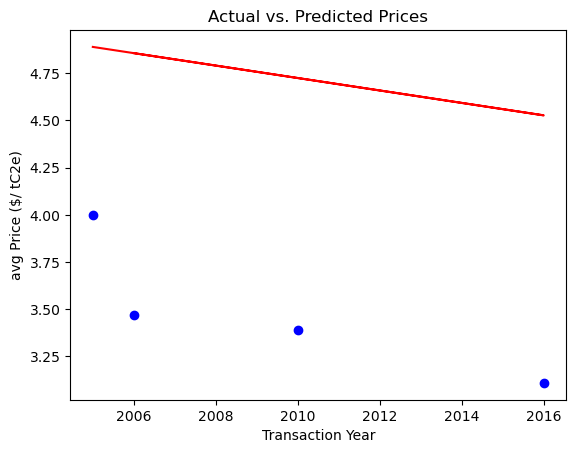

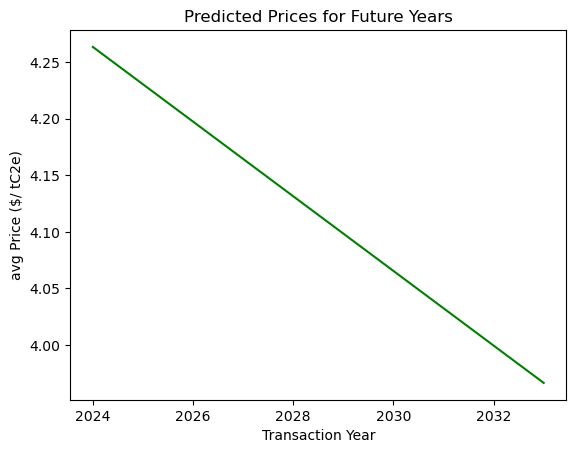

In [14]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Transaction Year')
plt.ylabel('avg Price ($/ tC2e)')
plt.title('Actual vs. Predicted Prices')
plt.show()

plt.plot(future_years, future_prices, color='green')
plt.xlabel('Transaction Year')
plt.ylabel('avg Price ($/ tC2e)')
plt.title('Predicted Prices for Future Years')
plt.show()

In [15]:
future_df = pd.DataFrame({'Transaction Year': future_years.flatten(), 'Predicted Price': future_prices})
final_df = pd.concat([df, future_df], ignore_index=True)
final_df.to_excel("carbon_price_predictions.xlsx", index=False)